# Perform comparative EDA between Men and Women Javelin Throwers

In [1]:
# Data handling
import pandas as pd
from datetime import datetime
import numpy as np

# Data analysis
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.interpolate import make_interp_spline

In [2]:
# Import pingouin for additional statistical analysis
import pingouin as pg
from pingouin import pairwise_ttests

In [3]:
# Import dataframe_image to export df as png
#!pip install dataframe_image
import dataframe_image as dfi

In [5]:
men_data = pd.read_csv('men_df.csv')
m_df = pd.DataFrame(men_data)
women_data = pd.read_csv('women_df.csv')
w_df = pd.DataFrame(women_data)

In [9]:
print(m_df.shape)
m_df.head(5)

(448, 9)


,Place,Competitor,DOB,Nat,Score,Event List,Age,Thrower Class,Gender
0,1,Anderson PETERS,21 OCT 1997,GRN,1461,Javelin Throw,25.0,1st Class,Male
1,2,Neeraj CHOPRA,24 DEC 1997,IND,1455,Javelin Throw,25.0,1st Class,Male
2,3,Jakub VADLEJCH,10 OCT 1990,CZE,1428,Javelin Throw,32.0,1st Class,Male
3,4,Julian WEBER,29 AUG 1994,GER,1385,Javelin Throw,28.0,1st Class,Male
4,5,Arshad NADEEM,02 JAN 1997,PAK,1306,Javelin Throw,26.0,1st Class,Male


In [8]:
print(w_df.shape)
w_df.head(5)

(432, 9)


,Place,Competitor,DOB,Nat,Score,Event List,Age,Thrower Class,Gender
0,1,Kara WINGER,10 APR 1986,USA,1382,Javelin Throw,37.0,1st Class,Female
1,2,Kelsey-Lee BARBER,20 SEP 1991,AUS,1367,Javelin Throw,31.0,1st Class,Female
2,3,Haruka KITAGUCHI,16 MAR 1998,JPN,1357,Javelin Throw,25.0,1st Class,Female
3,4,Mackenzie LITTLE,22 DEC 1996,AUS,1294,Javelin Throw,26.0,1st Class,Female
4,5,Elina TZENGKO,02 SEP 2002,GRE,1269,Javelin Throw,20.0,1st Class,Female


In [11]:
both_df = pd.concat([m_df, w_df])
both_df

,Place,Competitor,DOB,Nat,Score,Event List,Age,Thrower Class,Gender
0,1,Anderson PETERS,21 OCT 1997,GRN,1461,Javelin Throw,25.0,1st Class,Male
1,2,Neeraj CHOPRA,24 DEC 1997,IND,1455,Javelin Throw,25.0,1st Class,Male
2,3,Jakub VADLEJCH,10 OCT 1990,CZE,1428,Javelin Throw,32.0,1st Class,Male
3,4,Julian WEBER,29 AUG 1994,GER,1385,Javelin Throw,28.0,1st Class,Male
4,5,Arshad NADEEM,02 JAN 1997,PAK,1306,Javelin Throw,26.0,1st Class,Male
...,...,...,...,...,...,...,...,...,...
427,496,Yu-bin CHOI,06 NOV 2005,KOR,755,Javelin Throw,17.0,5th Class,Female
428,497,Saga KURUNMÄKI,05 JAN 2003,FIN,755,Javelin Throw,20.0,5th Class,Female
429,498,Yasmin WILKE,05 JAN 2003,GER,754,Javelin Throw,20.0,5th Class,Female
430,499,Júlia HANULIAKOVÁ,16 MAY 2000,SVK,754,Javelin Throw,22.0,5th Class,Female


<AxesSubplot:ylabel='Frequency'>

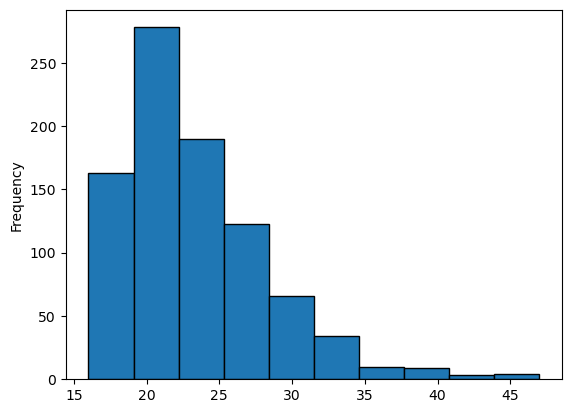

In [14]:
both_df.Age.plot.hist(edgecolor='black')

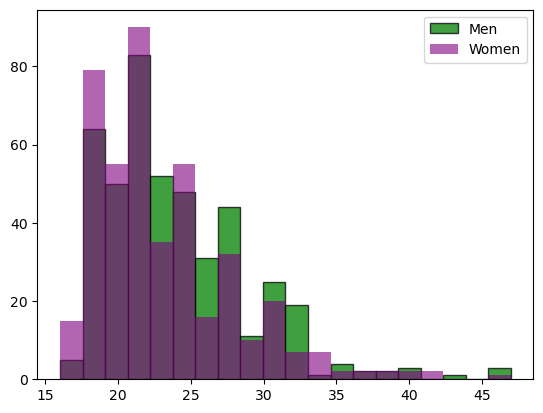

In [38]:
men_age = both_df[both_df.Gender == "Male"].Age
women_age = both_df[both_df.Gender == "Female"].Age

plt.hist(men_age, bins=20, alpha=0.75, label="Men", color="green", edgecolor = 'black')
plt.hist(women_age, bins=20, alpha=0.6, label="Women", color="purple")
plt.legend()
plt.show()

## Question: Is there a difference in mean age between Elite Men and Women Javelin Throwers?

In [36]:
pairwise = pg.pairwise_gameshowell(data=both_df, dv='Age', between='Gender').sort_values(['pval'], ascending = True).set_index('A')
pairwise

,B,mean(A),mean(B),diff,se,T,df,pval,hedges
A,,,,,,,,,
Female,Male,23.141204,24.017857,-0.876653,0.325703,-2.691572,877.735205,0.007247,-0.181163


## Answer: Yes. The average age of women is .88 years younger than men. 

## It's clear for previous analyses that 1st Class throwers of both genders are significantly older than lower classes. The question now is: How do the ages of 1st Class Throwers compare between Genders?

In [20]:
First_Class = both_df[both_df["Thrower Class"] == "1st Class"]

<AxesSubplot:ylabel='Frequency'>

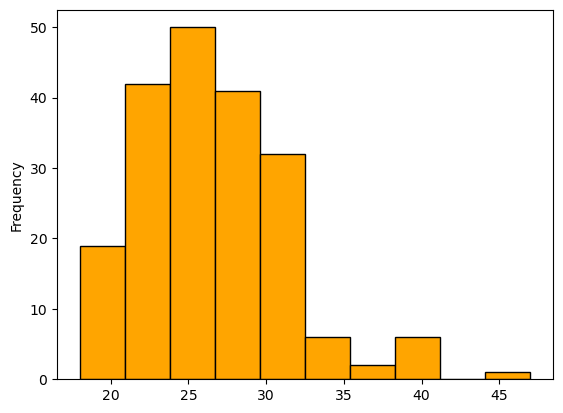

In [25]:
First_Class.Age.plot.hist(color='orange',edgecolor='black')

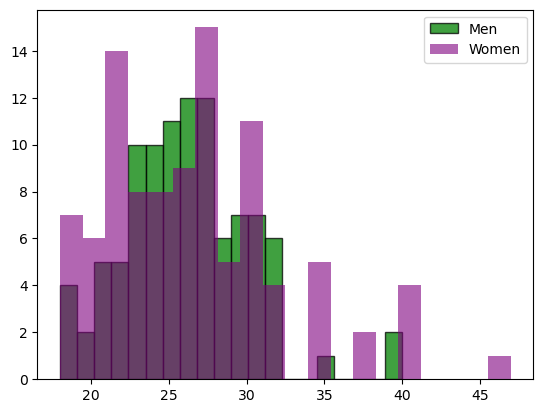

In [39]:
fc_men_age = First_Class[First_Class.Gender == "Male"].Age
fc_women_age = First_Class[First_Class.Gender == "Female"].Age

plt.hist(fc_men_age, bins=20, alpha=0.75, label="Men", color="green", edgecolor = 'black')
plt.hist(fc_women_age, bins=20, alpha=0.6, label="Women", color="purple")
plt.legend()
plt.show()

In [40]:
pairwise = pg.pairwise_gameshowell(data=First_Class, dv='Age', between='Gender').sort_values(['pval'], ascending = True).set_index('A')
pairwise

,B,mean(A),mean(B),diff,se,T,df,pval,hedges
A,,,,,,,,,
Female,Male,26.727273,26.09,0.637273,0.70595,0.902716,176.302187,0.367908,0.127712


## There is no sigificant difference betweewn the mean age of 1st Class Javelin Throwers between genders and the difference itself is relatively smaller than that observed in the pairwise ttest for the Top 500 datasets (.63 vs. -.88 respectively).